# Kaggle Home price prediction

### by Mohtadi Ben Fraj

#### In this version, we find the most correlated variables with 'SalePrice' and them in our Sklearn models

In [1]:
# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Modelling Helpers
from sklearn.preprocessing import Imputer , Normalizer , scale, StandardScaler
from sklearn.cross_validation import train_test_split , StratifiedKFold
from sklearn.feature_selection import RFECV

# Stats helpers
from scipy.stats import norm
from scipy import stats

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

/home/maviator/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Load train and test data

In [2]:
# get home price train & test csv files as a DataFrame
train = pd.read_csv("../Data/train.csv")
test    = pd.read_csv("../Data/test.csv")
full = train.append(test, ignore_index=True)
print (train.shape, test.shape, full.shape)

((1460, 81), (1459, 80), (2919, 81))


In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
train.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

## Exploring 'SalePrice'

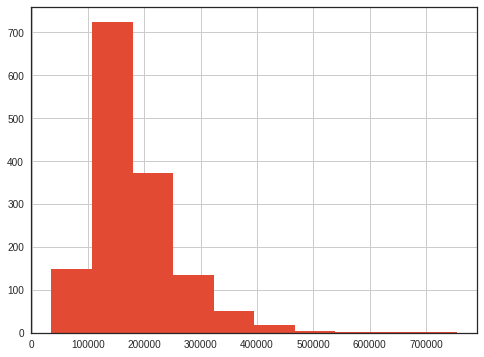

In [6]:
train.SalePrice.hist()

## 'SalePrice' correlation matrix

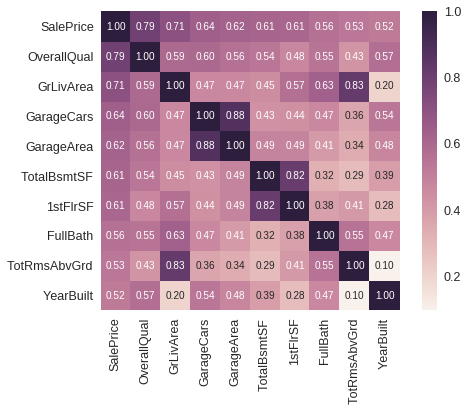

In [7]:
#correlation matrix
corrmat = train.corr()

#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

From this correlation map we can make the following interpretations:
- 'GarageCars' and 'GarageArea' are highly correlated which makes sense. Therefore choosing only one of them is sufficient. Since 'GarageCars' has higher correlation with 'SalePrice', we eliminate 'GarageArea'
- '1stFlrSF' and 'TotalBsmtSF' are highly correlated. Therefore choosing only one of them is reasonable. We keep 'TotalBsmtSF' since it's more correlated with 'SalePrice'
- 'TotRmsAbvGrd' and 'GrLivArea' are highly correlated and therefore we will keep only 'GrLivArea'.
We keep the following variables: 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt'

In [8]:
col = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
       'FullBath', 'YearBuilt'
      ]

In [9]:
train_selected = train[col]
test_selected = test[col]
print train_selected.shape, test_selected.shape

(1460, 6) (1459, 6)


## Missing Data

In [10]:
#missing data in train_selected data
total = train_selected.isnull().sum().sort_values(ascending=False)
percent = (train_selected.isnull().sum()/train_selected.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
YearBuilt,0,0.0
FullBath,0,0.0
TotalBsmtSF,0,0.0
GarageCars,0,0.0
GrLivArea,0,0.0
OverallQual,0,0.0


In [11]:
#missing data in test_selected data
total = test_selected.isnull().sum().sort_values(ascending=False)
percent = (test_selected.isnull().sum()/test_selected.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
TotalBsmtSF,1,0.000685
GarageCars,1,0.000685
YearBuilt,0,0.000000
FullBath,0,0.000000
GrLivArea,0,0.000000
OverallQual,0,0.000000


Only 1 entry has missing values for the 'TotalBsmtSF' and 'GarageCars'. We will fill them with -1

In [12]:
test_selected.TotalBsmtSF.fillna(0, inplace=True);
test_selected.GarageCars.fillna(0, inplace=True);

/home/maviator/anaconda2/lib/python2.7/site-packages/pandas/core/generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Make sure Test data has no more missing data

In [13]:
#missing data in test data
total = test_selected.isnull().sum().sort_values(ascending=False)
percent = (test_selected.isnull().sum()/test_selected.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
YearBuilt,0,0.0
FullBath,0,0.0
TotalBsmtSF,0,0.0
GarageCars,0,0.0
GrLivArea,0,0.0
OverallQual,0,0.0


## Categorical Features

### In this section, we will explore the categorical features in our dataset and find out which ones can be relevant to improve the accuracy of our prediction

### 1. MSSubClass: Identifies the type of dwelling involved in the sale

In [14]:
train.MSSubClass.isnull().sum()

0

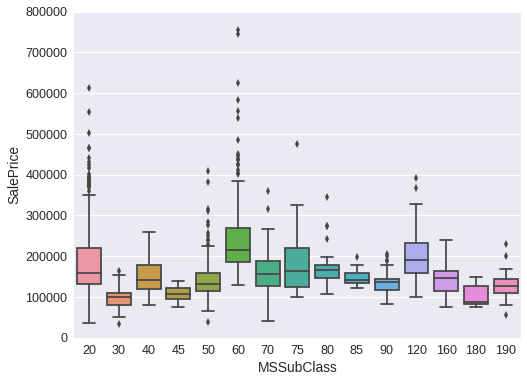

In [15]:
#box plot MSSubClass/saleprice
var = 'MSSubClass'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

Some observations:
- Newer built houses (1946 and newer) are more expensive
- 2 story properties are more expensive than 1 or 1-1/2 story properties

First option that we can do is to map each choice to a binary feature. This will result in 16 additional features

Second option is to replacce all 16 features with more higher level binary representation. For example: newer or older than 1946, 1 or 1-1/2 story property, 2 or 2-1/2 story property, PUD

### 1.a First option

In [16]:
ms_sub_class_train = pd.get_dummies(train.MSSubClass, prefix='MSSubClass')
ms_sub_class_train.shape

(1460, 15)

According to the features description, there is 16 possible values for 'MSSubClass', we only got 15 which means one value is never present in the train data. To solve this, we need to find that value and add a column with zeros to our features

In [17]:
ms_sub_class_train.head()

,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


The missing value is 150. So we will add a column with label 'MSSubClass_150'

In [18]:
ms_sub_class_train['MSSubClass_150'] = 0
ms_sub_class_train.head()

,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_150
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


Let's do the same thing for the test data

In [19]:
ms_sub_class_test = pd.get_dummies(test.MSSubClass, prefix='MSSubClass')
ms_sub_class_test.shape

(1459, 16)

In [20]:
ms_sub_class_test.head()

,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


For the test data we have all 16 values so no columns need to be added

### 2. MSZoning: Identifies the general zoning classification of the sale

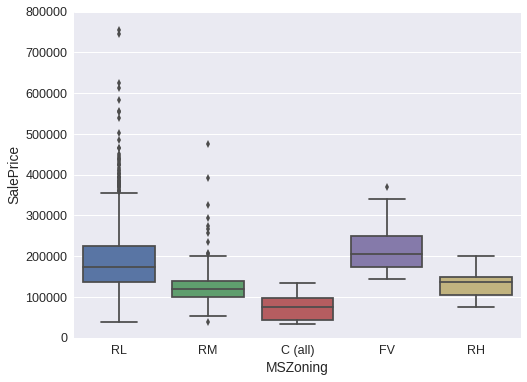

In [21]:
#box plot MSSubClass/saleprice
var = 'MSZoning'
data =pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

In [22]:
ms_zoning_train = pd.get_dummies(train.MSZoning, prefix='MSZoning')
ms_zoning_train.shape

(1460, 5)

In [23]:
ms_zoning_train.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [24]:
ms_zoning_test = pd.get_dummies(test.MSZoning, prefix='MSZoning')
ms_zoning_test.shape

(1459, 5)

### 3. Street: Type of road access to property

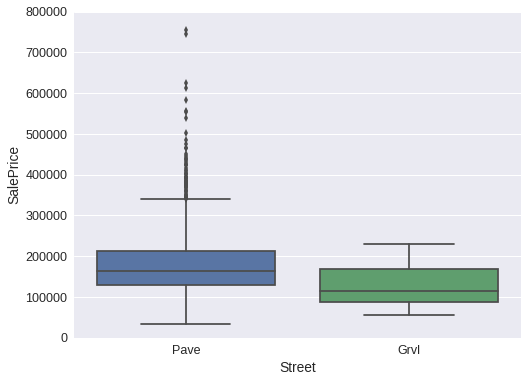

In [25]:
var = 'Street'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

In [26]:
# Transform Street into binary values 0 and 1
street_train = pd.Series(np.where(train.Street == 'Pave', 1, 0), name='Street')
street_train.shape

(1460,)

In [27]:
street_train.head()

0    1
1    1
2    1
3    1
4    1
Name: Street, dtype: int64

In [28]:
street_test = pd.Series(np.where(test.Street == 'Pave', 1, 0), name='Street')
street_test.shape

(1459,)

In [29]:
street_test.head()

0    1
1    1
2    1
3    1
4    1
Name: Street, dtype: int64

### 4. Alley: Type of alley access to property

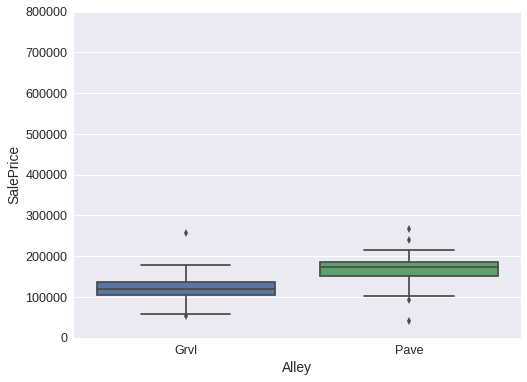

In [30]:
var = 'Alley'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

In [31]:
alley_train = pd.get_dummies(train.Alley, prefix='Alley')
alley_train.shape

(1460, 2)

In [32]:
alley_train.head()

,Alley_Grvl,Alley_Pave
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [33]:
alley_test = pd.get_dummies(test.Alley, prefix='Alley')
alley_test.shape

(1459, 2)

### 5. LotShape: General shape of property

In [34]:
train.LotShape.isnull().sum()

0

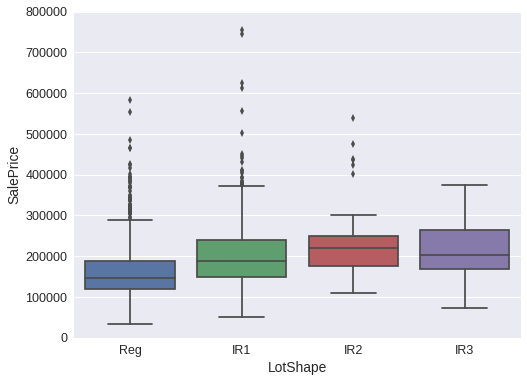

In [35]:
var = 'LotShape'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

In [36]:
lot_shape_train = pd.get_dummies(train.LotShape, prefix='LotShape')
lot_shape_train.shape

(1460, 4)

In [37]:
lot_shape_test = pd.get_dummies(test.LotShape, prefix='LotShape')
lot_shape_test.shape

(1459, 4)

In [38]:
lot_shape_test.head()

,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg
0,0,0,0,1
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


### 6. LandContour: Flatness of the property

In [39]:
train.LandContour.isnull().sum()

0

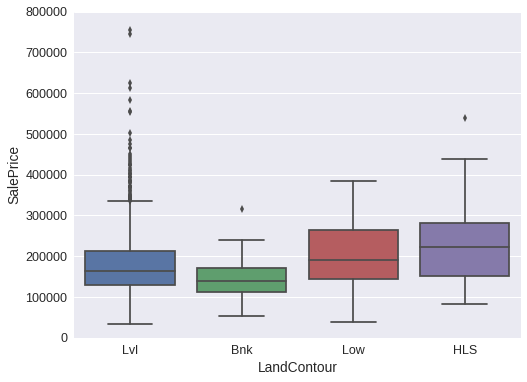

In [40]:
var = 'LandContour'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

In [41]:
land_contour_train = pd.get_dummies(train.LandContour, prefix='LandContour')
land_contour_train.shape

(1460, 4)

In [42]:
land_contour_test = pd.get_dummies(test.LandContour, prefix='LandContour')
land_contour_test.shape

(1459, 4)

### 7. Utilities: Type of utilities available

In [43]:
train.Utilities.isnull().sum()

0

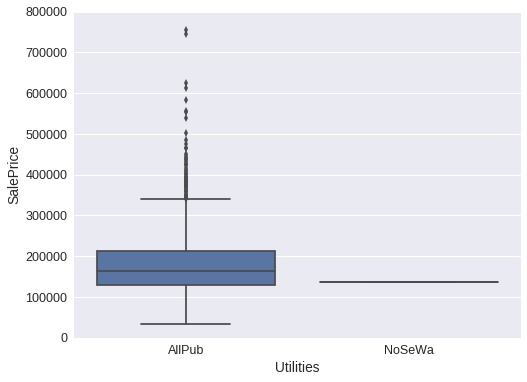

In [44]:
var = 'Utilities'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

### 8. LotConfig: Lot configuration

In [45]:
train.LotConfig.isnull().sum()

0

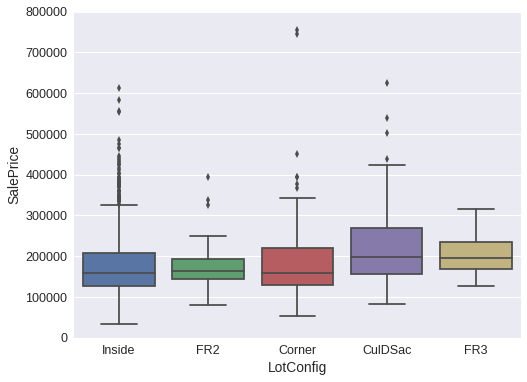

In [46]:
var = 'LotConfig'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

### 9. LandSlope: Slope of property

In [47]:
train.LandSlope.isnull().sum()

0

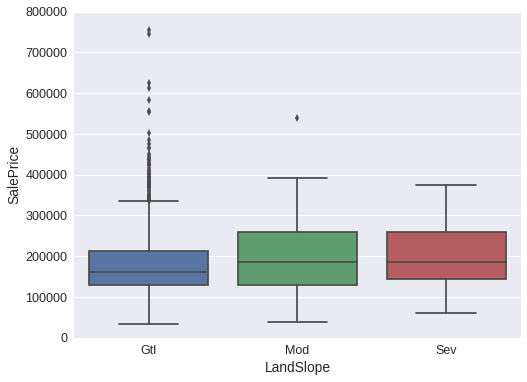

In [48]:
var = 'LandSlope'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

### 10. Neighborhood: Physical locations within Ames city limits

In [49]:
train.Neighborhood.isnull().sum()

0

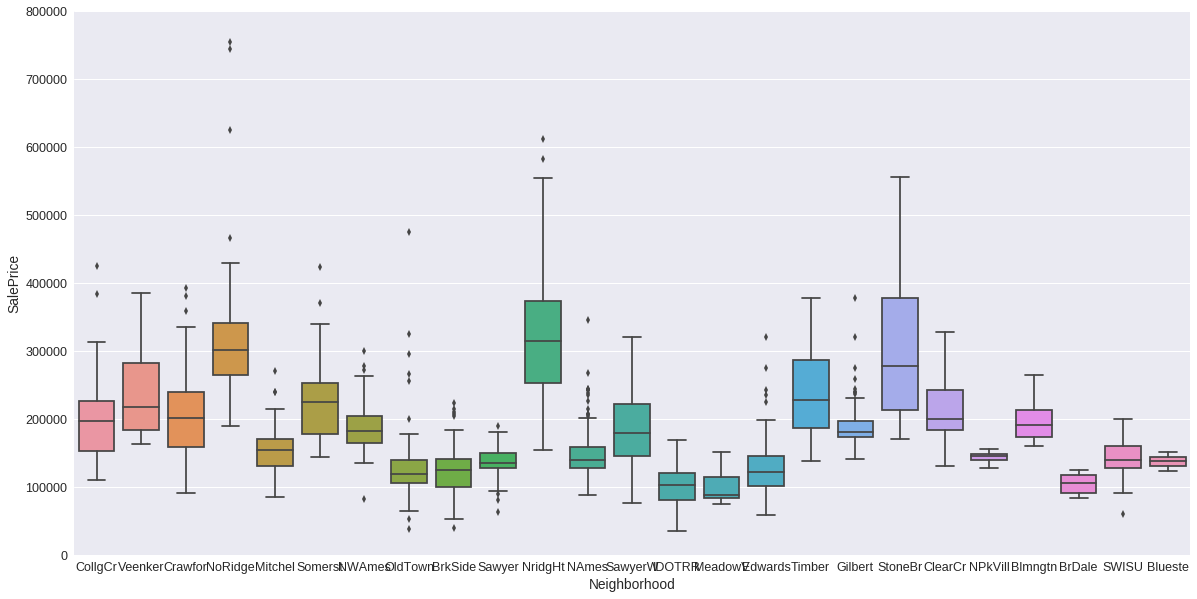

In [50]:
var = 'Neighborhood'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

In [51]:
neighborhood_train = pd.get_dummies(train.Neighborhood, prefix='N')
neighborhood_train.shape

(1460, 25)

In [52]:
neighborhood_test = pd.get_dummies(test.Neighborhood, prefix='N')
neighborhood_test.shape

(1459, 25)

### 11. Condition1: Proximity to various conditions

In [53]:
train.Condition1.isnull().sum()

0

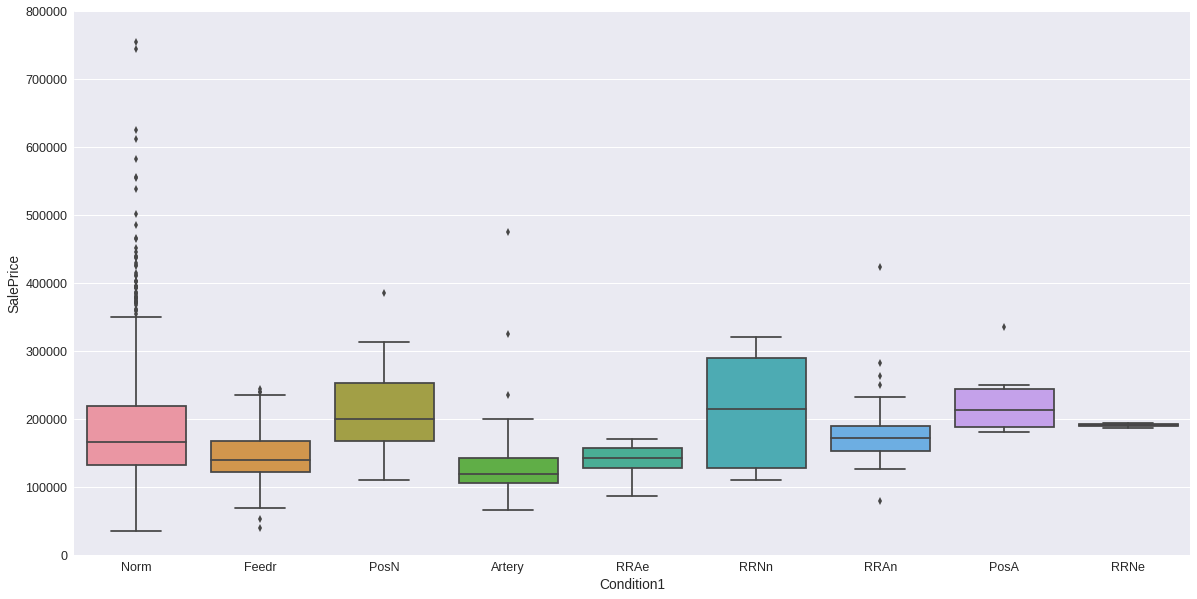

In [54]:
var = 'Condition1'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

### 12. BldgType: Type of dwelling

In [55]:
train.BldgType.isnull().sum()

0

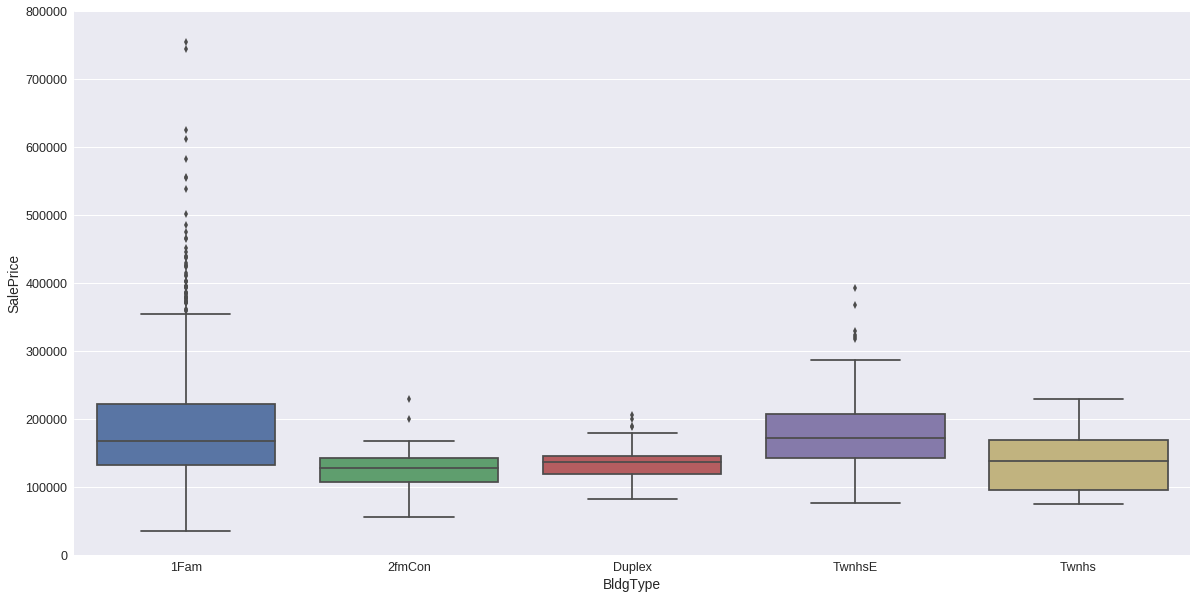

In [56]:
var = 'BldgType'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

In [57]:
bldgtype_train = pd.get_dummies(train.BldgType, prefix='Bldg')
bldgtype_train.shape

(1460, 5)

In [58]:
bldgtype_test = pd.get_dummies(test.BldgType, prefix='Bldg')
bldgtype_test.shape

(1459, 5)

### 13. BsmtCond: Evaluates the general condition of the basement

In [59]:
train.BsmtCond.isnull().sum()

37

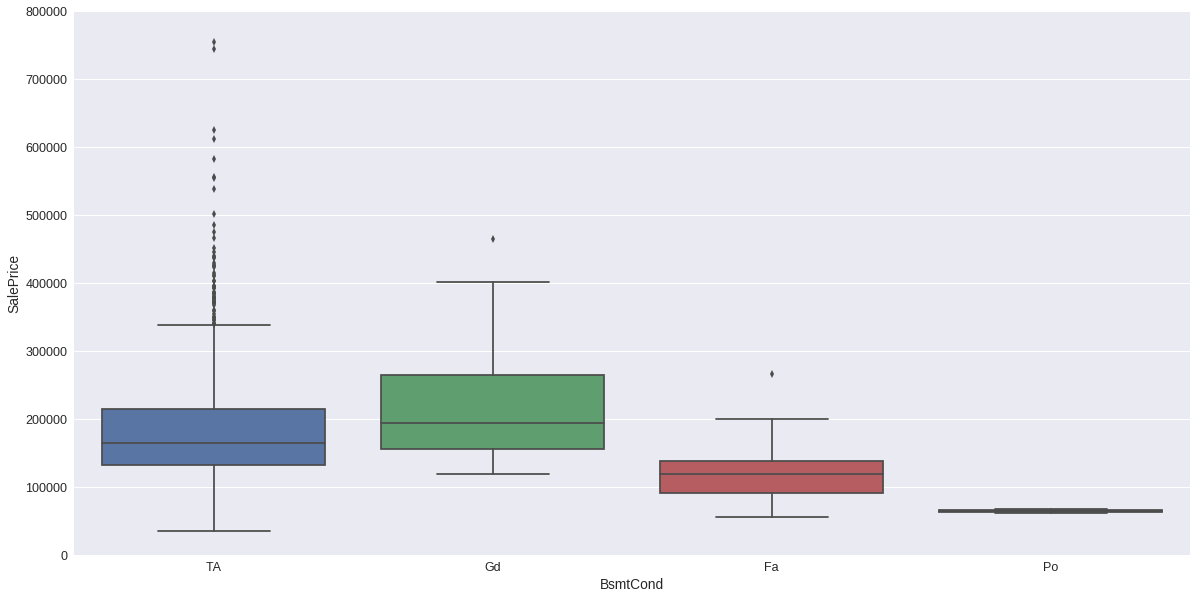

In [60]:
var = 'BsmtCond'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

In [61]:
bsmtCond_train = pd.get_dummies(train.BsmtCond, prefix='Bldg')
bsmtCond_train.shape

(1460, 4)

In [62]:
bsmtCond_test = pd.get_dummies(test.BsmtCond, prefix='Bldg')
bsmtCond_test.shape

(1459, 4)

### 14. SaleCondition: Condition of sale

In [63]:
train.SaleCondition.isnull().sum()

0

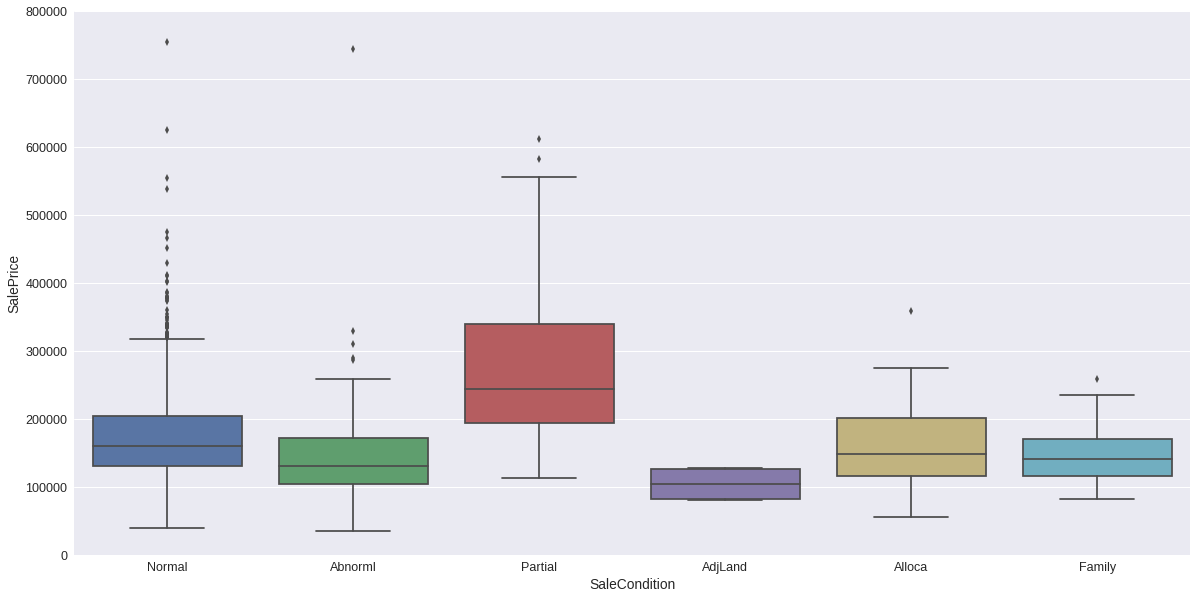

In [64]:
var = 'SaleCondition'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

In [65]:
saleCond_train = pd.get_dummies(train.SaleCondition, prefix='saleCond')
saleCond_train.shape

(1460, 6)

In [66]:
saleCond_test = pd.get_dummies(test.SaleCondition, prefix='saleCond')
saleCond_test.shape

(1459, 6)

## Concatenate features

Let's concatenate the additional features for the train and test data

Features to choose from:
- ms_sub_class
- ms_zoning
- street
- ms_alley
- lot_shape
- land_contour
- neighborhood
- bldgtype
- bsmtCond
- saleCond

In [67]:
train_selected = pd.concat([train_selected,
                            ms_zoning_train,
                            alley_train,
                            land_contour_train], axis=1)
train_selected.shape

(1460, 17)

In [68]:
test_selected = pd.concat([test_selected,
                           ms_zoning_test,
                           alley_test,
                           land_contour_test], axis=1)
test_selected.shape

(1459, 17)

## Train, validation split

In [69]:
#train_selected_y = train.SalePrice
train_selected_y = np.log1p(train["SalePrice"])
train_selected_y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [70]:
train_x, valid_x, train_y, valid_y = train_test_split(train_selected, 
                                                      train_selected_y,
                                                     train_size=0.7)
train_x.shape, valid_x.shape, train_y.shape, valid_y.shape, test_selected.shape

((1021, 17), (439, 17), (1021,), (439,), (1459, 17))

## Modelling

In [71]:
model = RandomForestRegressor(n_estimators=100)
#model = SVC()
#model = GradientBoostingRegressor()
#model = KNeighborsClassifier(n_neighbors = 3)
#model = GaussianNB()
#model = LogisticRegression()

In [72]:
model.fit(train_x, train_y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [73]:
# Score the model
print (model.score(train_x, train_y), model.score(valid_x, valid_y))

(0.92115737905682393, 0.84029051291273027)


In [75]:
model.fit(train_selected, train_selected_y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

## Submission

In [76]:
test_y = model.predict(test_selected)
test_y = np.expm1(test_y)
test_id = test.Id
test_submit = pd.DataFrame({'Id': test_id, 'SalePrice': test_y})
test_submit.shape
test_submit.head()
test_submit.to_csv('house_price_pred_log.csv', index=False)

## Remarks

- Using the correlation method, we were able to go from 36 variables to only 6. Performance wise the score dropped from 0.22628 to 0.22856 using a Random Forest model. I believe we can further improve it by analysing the categorical variables.

- Using binary variables for the categorical feature 'MSSubClass' seemed to decrease the performance of the prediction

- Using binary variable for the categorical feature 'MSZoning' improved the error of the model from 0.22628 to 0.21959.

- Using binary variable for the categorical feature 'Street' decreased the perdormance of the model

- Using binary variable for the categorical feature 'Alley' improved the error of the model from 0.21959 to 0.21904.

- Using binary variable for the categorical feature 'LotShape' decreased the performance of the model.

- Using binary variable for the categorical feature 'LandContour' improved the error from 0.21904 to 0.21623.

- Using binary variable for the categorical feature 'Neighborhood' decreased the performance of the model.

- Using binary variable for the categorical feature 'Building type' decreased the performance of the model.

- Using the binary variable of the categorical feature 'BsmntCond' decreased the performance of the model.

- Using the binary variable fot the categorical feature 'SaleCondition' decreased the performance of the model.

- Never, EVER, use a classification model for regression!!! Changed RandomForestClassifier to RandomForestRegressor and improved error from 0.21623 to 0.16517

- Applied log+1 to 'SalePrice' to remove skewness. Error improved from 0.16517 to 0.16083

## Credits

Many of the analysis and core snippets are from this very detailed post: https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python

## Links

- Are categorical variables getting lost in your random forests? (https://roamanalytics.com/2016/10/28/are-categorical-variables-getting-lost-in-your-random-forests/)